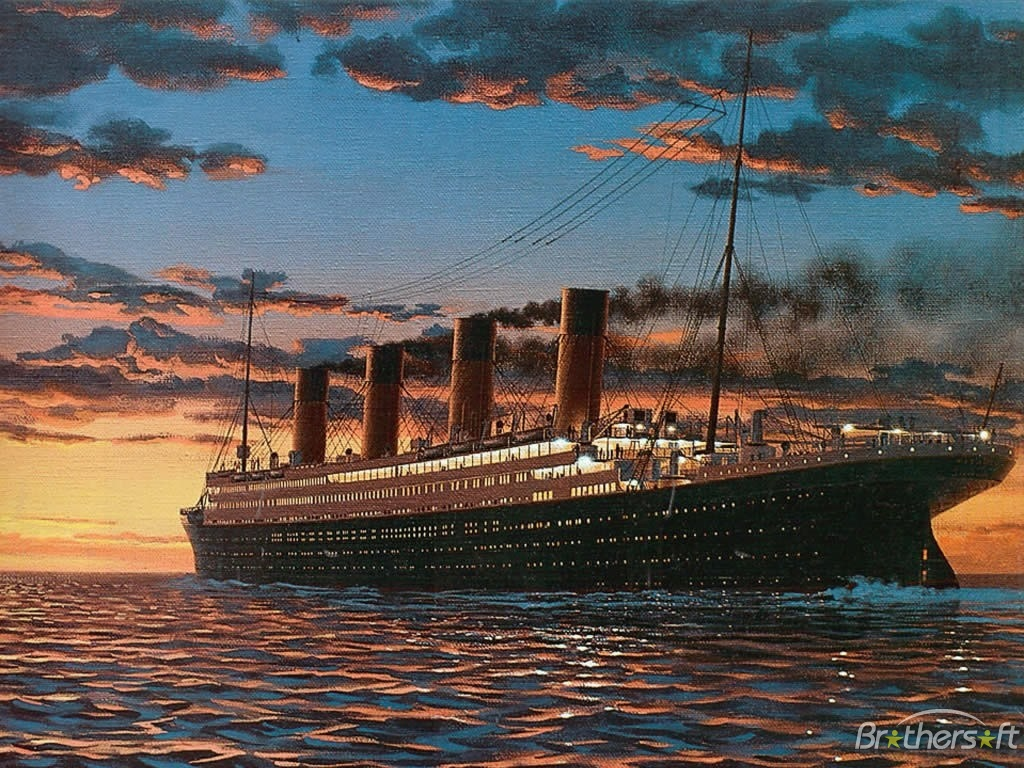


# Analyse de données

# Le Titanic

Comme vous le savez certainement, le RMS Titanic a coulé lors de son
voyage inaugural dans la nuit du 14 au 15 avril 1912 (plus
d’informations voir la page wikipedia de la catastrophe )

Ce qui est intéressant, c'est que l'on a récupéré le manifeste du navire
qui contient de nombreuses informations. Certains s'amusent à prédire
les personnes qui vont survivre à partir des informations de ce
manifeste et y arrivent relativement bien. La prédiction de la survie
des passagers est un exercice de Data Science intéressant mais il
dépasse le niveau de ce cours. Je vous propose ici à partir des éléments
que nous avons vus de tirer et visualiser des informations.


## Chargement des données et exploration

Les données sont stockées au format csv dans un fichier
'data-titanic.csv' qui vous sera fourni par votre enseignant. Utilisez
pandas vous lire ces données et affichez par exemples les 10 premières
lignes.

Le fichier comporte 1309 lignes. La page wikipedia nous indique 953
passagers et 899 membres d'équipage ce qui semble indiqué que notre base
est incomplète, ce qui est généralement souvent le cas.

Voici quelques informations sur les colonnes de notre manifeste du RMS
Titanic :

-   PassengerId : numéro unique de passage

-   Survived : 1,0 si le passager a survécu 0 sinon

-   Pclass : classe du passager

-   Name : nom du passager

-   Sex : sexe du passager

-   Age : âge du passager

-   SibSp : nombre de parents/épouses présents sur le HMS Titanic

-   Parch : nombre de parents / enfants

-   Ticket : numéro du ticket

-   Fare : montant du billet

-   Cabin : catégorie de la cabine

-   Embarked : port d'embarquement (C= Cherbourg, Q=Queentown, S =
    Southampton)

In [9]:
import pandas as pd
titanic_df = pd.read_csv('data-titanic.csv')
print(titanic_df)

      PassengerId  Survived  Pclass  \
0               1       0.0       3   
1               2       1.0       1   
2               3       1.0       3   
3               4       1.0       1   
4               5       0.0       3   
...           ...       ...     ...   
1304         1305       NaN       3   
1305         1306       NaN       1   
1306         1307       NaN       3   
1307         1308       NaN       3   
1308         1309       NaN       3   

                                                   Name     Sex   Age  SibSp  \
0                               Braund, Mr. Owen Harris    male  22.0      1   
1     Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                                Heikkinen, Miss. Laina  female  26.0      0   
3          Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                              Allen, Mr. William Henry    male  35.0      0   
...                                                

### Quels sont les données entier, réel, objets ?

### Donnez une description des données concernant le Titanic

### Calculez le nombre de personnes qui ont survécu, calculez le pourcentage

J'ai trouvé sur 891 données renseignées, 549 décès et 342 survivants.

décès 61,61 %

survivants ; 38,38 %

In [10]:
# Identifier les colonnes par type
columns_int = titanic_df.select_dtypes(include=['int']).columns.tolist()
columns_float = titanic_df.select_dtypes(include=['float']).columns.tolist()
columns_object = titanic_df.select_dtypes(include=['object']).columns.tolist()

# Afficher les colonnes par type
print("Colonnes contenant des valeurs entières :")
print(columns_int)

print("\nColonnes contenant des valeurs réelles (float) :")
print(columns_float)

print("\nColonnes contenant des objets (strings ou autres types) :")
print(columns_object)

Colonnes contenant des valeurs entières :
['PassengerId', 'Pclass', 'SibSp', 'Parch']

Colonnes contenant des valeurs réelles (float) :
['Survived', 'Age', 'Fare']

Colonnes contenant des objets (strings ou autres types) :
['Name', 'Sex', 'Ticket', 'Cabin', 'Embarked']


In [18]:
# Obtenir un aperçu des données
print(titanic_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1309 non-null   int64  
 1   Survived     891 non-null    float64
 2   Pclass       1309 non-null   int64  
 3   Name         1309 non-null   object 
 4   Sex          1309 non-null   object 
 5   Age          1046 non-null   float64
 6   SibSp        1309 non-null   int64  
 7   Parch        1309 non-null   int64  
 8   Ticket       1309 non-null   object 
 9   Fare         1308 non-null   float64
 10  Cabin        295 non-null    object 
 11  Embarked     1307 non-null   object 
dtypes: float64(3), int64(4), object(5)
memory usage: 122.8+ KB
None


In [19]:
# Afficher les 5 premières lignes
print(titanic_df.head())

   PassengerId  Survived  Pclass  \
0            1       0.0       3   
1            2       1.0       1   
2            3       1.0       3   
3            4       1.0       1   
4            5       0.0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S  


In [20]:
# Statistiques descriptives des colonnes numériques
print(titanic_df.describe())

       PassengerId    Survived       Pclass          Age        SibSp  \
count  1309.000000  891.000000  1309.000000  1046.000000  1309.000000   
mean    655.000000    0.383838     2.294882    29.881138     0.498854   
std     378.020061    0.486592     0.837836    14.413493     1.041658   
min       1.000000    0.000000     1.000000     0.170000     0.000000   
25%     328.000000    0.000000     2.000000    21.000000     0.000000   
50%     655.000000    0.000000     3.000000    28.000000     0.000000   
75%     982.000000    1.000000     3.000000    39.000000     1.000000   
max    1309.000000    1.000000     3.000000    80.000000     8.000000   

             Parch         Fare  
count  1309.000000  1308.000000  
mean      0.385027    33.295479  
std       0.865560    51.758668  
min       0.000000     0.000000  
25%       0.000000     7.895800  
50%       0.000000    14.454200  
75%       0.000000    31.275000  
max       9.000000   512.329200  


In [23]:
# Calcul du pourcentage de valeurs manquantes par colonne
missing_data = titanic_df.isnull().sum() / len(titanic_df) * 100
print(missing_data[missing_data > 0].sort_values(ascending=False))

Cabin       77.463713
Survived    31.932773
Age         20.091673
Embarked     0.152788
Fare         0.076394
dtype: float64


In [11]:
# Calculer le nombre total de survivants
num_survived = titanic_df['Survived'].sum()

# Calculer le pourcentage de survivants
total_passengers = len(titanic_df)
percentage_survived = (num_survived / total_passengers) * 100

# Afficher les résultats
print(f"Nombre de survivants : {num_survived}")
print(f"Pourcentage de survivants : {percentage_survived:.2f}%")

Nombre de survivants : 342.0
Pourcentage de survivants : 26.13%


In [12]:
#accès à une colonne
print(titanic_df['Survived'])

0       0.0
1       1.0
2       1.0
3       1.0
4       0.0
       ... 
1304    NaN
1305    NaN
1306    NaN
1307    NaN
1308    NaN
Name: Survived, Length: 1309, dtype: float64


In [15]:
# Supprimer les lignes où la colonne contient des NaN
New_df = titanic_df.dropna(subset=['Survived'])

# S'assurer que la colonne est convertie en int
New_df['Survived'] = New_df['Survived'].astype(int)

print(New_df)

     PassengerId  Survived  Pclass  \
0              1         0       3   
1              2         1       1   
2              3         1       3   
3              4         1       1   
4              5         0       3   
..           ...       ...     ...   
886          887         0       2   
887          888         1       1   
888          889         0       3   
889          890         1       1   
890          891         0       3   

                                                  Name     Sex   Age  SibSp  \
0                              Braund, Mr. Owen Harris    male  22.0      1   
1    Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                               Heikkinen, Miss. Laina  female  26.0      0   
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                             Allen, Mr. William Henry    male  35.0      0   
..                                                 ...     ...   ... 

C:\Users\Lahro\AppData\Local\Temp\ipykernel_15036\796666160.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  New_df['Survived'] = New_df['Survived'].astype(int)


In [16]:
# Calculer le nombre total de survivants
num_survived = New_df['Survived'].sum()

# Calculer le pourcentage de survivants
total_passengers = len(New_df)
percentage_survived = (num_survived / total_passengers) * 100

# Afficher les résultats
print(f"Nombre de survivants : {num_survived}")
print(f"Pourcentage de survivants : {percentage_survived:.2f}%")

Nombre de survivants : 342
Pourcentage de survivants : 38.38%



### La méthode groupby

Il est temps d'introduire une nouvelle méthode qui nous permet de
travailler sur les DataFrame de manière agréable. Il s'agit de la
méthode groupy() qui permet de grouper les données suivant certains
critères.

Généralement, on part du principe que groupby() est basé sur trois
étapes : séparation, application et combinaison.

La **séparation** est la partie la plus simple, on sépare notre
DataFrame en fonction d'un critère (généralement une ou plusieurs
colonnes). Ensuite, on **applique** des fonctions sir les groupes
obtenus à l'étape précédente. Finalement, on **combine** les résultats
obtenus pour chaque groupe.

La feuille de (*Python pour le Data Scientist*– E. Jakobowicz), vous
donne quelques-une des fonctions qu'il est possible d'appeler après
avoir réalisé la séparation.

par exemple pour grouper les éléments de la DataFrame suivant la classe
des cabines, on pourra écrire :

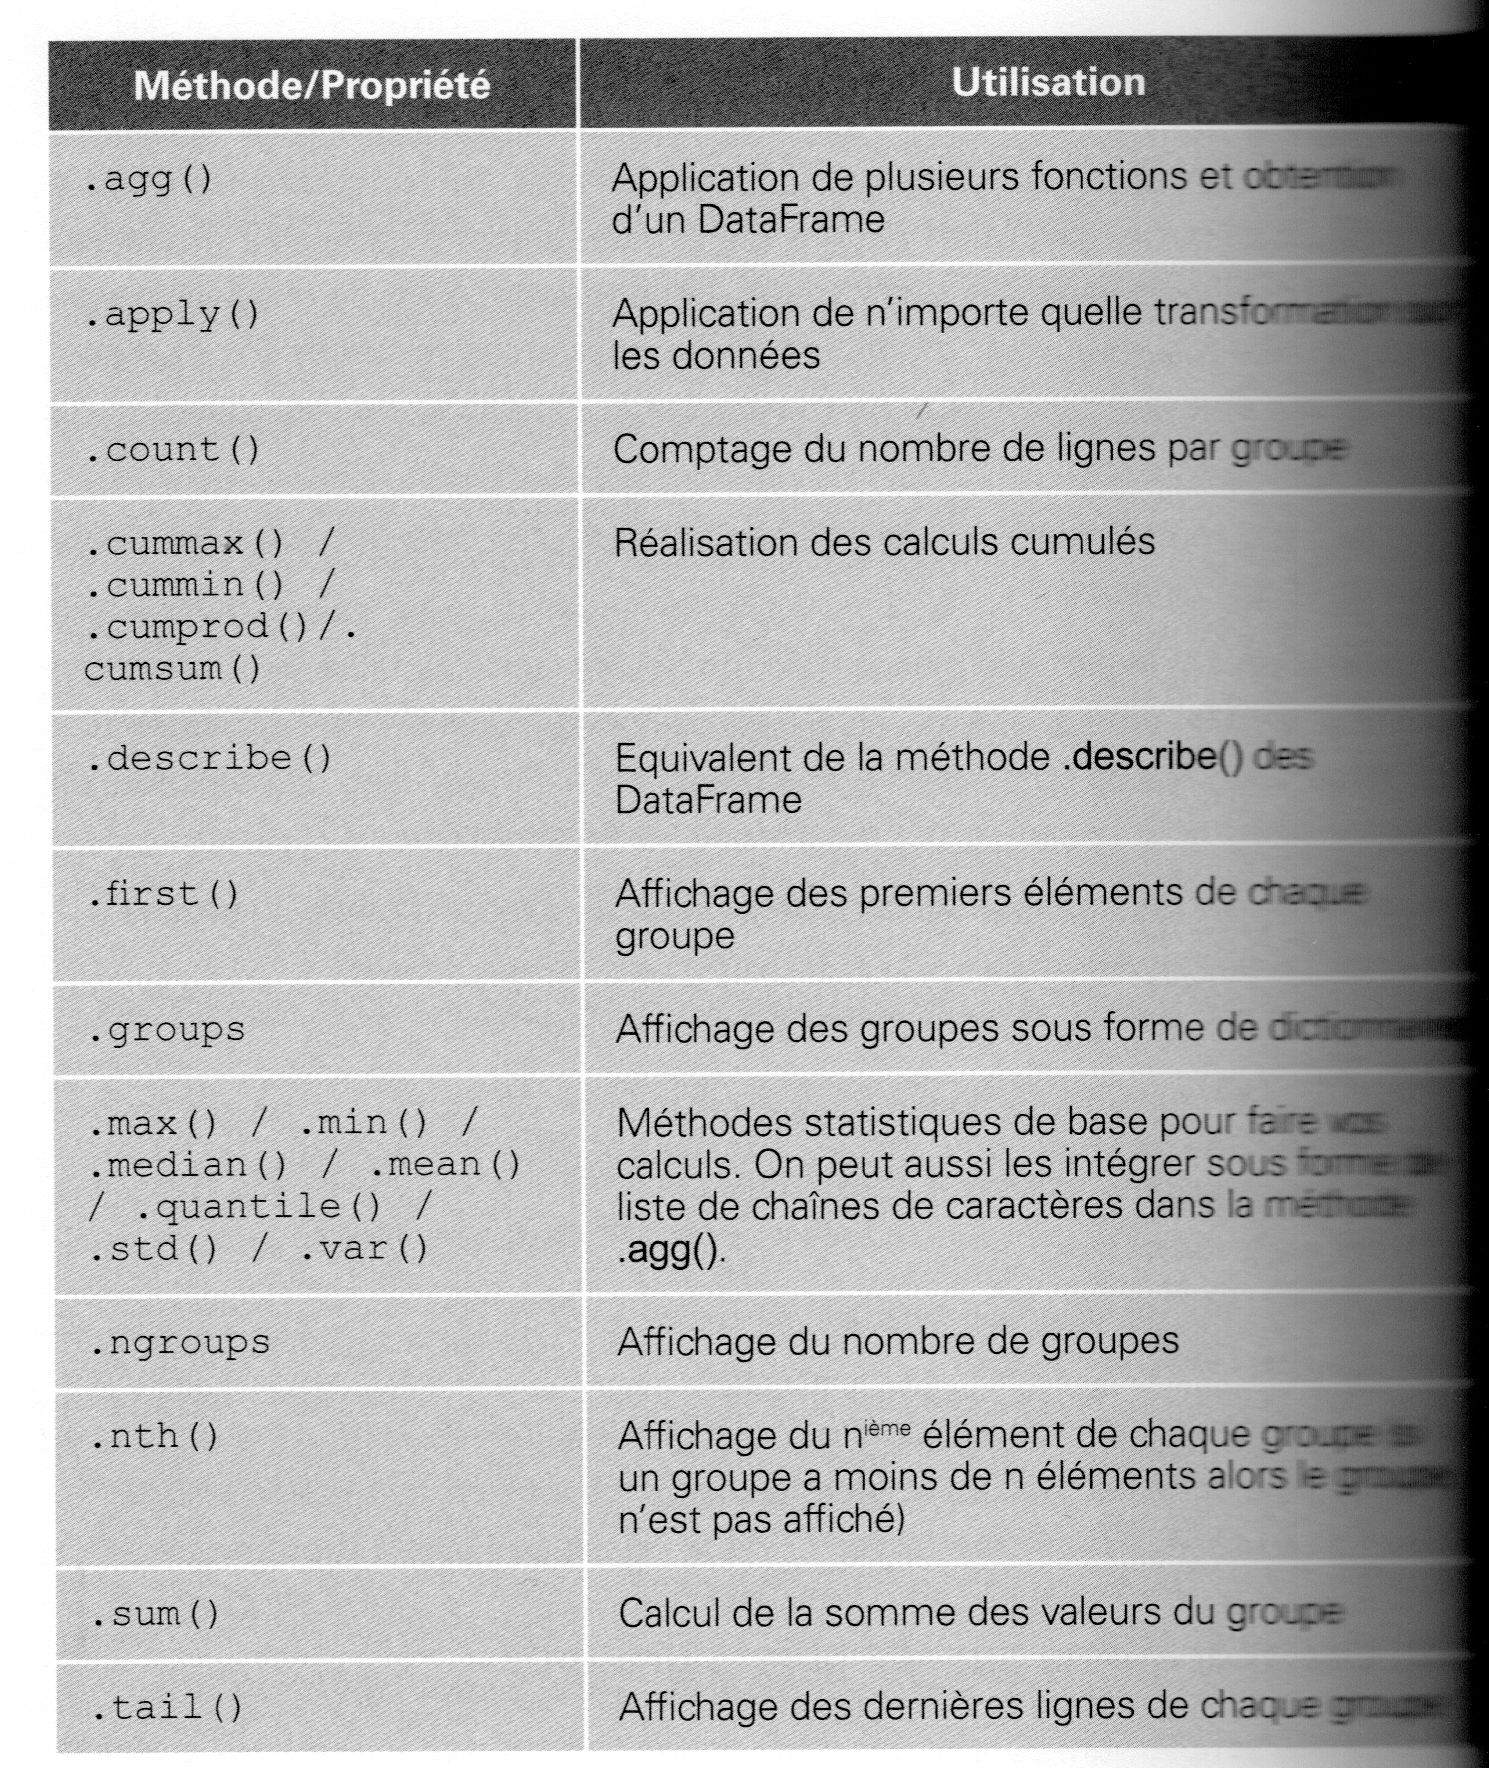

In [24]:
test = titanic.groupby('Pclass')
test.sample(3)

PassengerId  Survived  Pclass  \
630          631       1.0       1   
31            32       1.0       1   
572          573       1.0       1   
551          552       0.0       2   
292          293       0.0       2   
635          636       1.0       2   
471          472       0.0       3   
688          689       0.0       3   
834          835       0.0       3   

                                               Name     Sex   Age  SibSp  \
630            Barkworth, Mr. Algernon Henry Wilson    male  80.0      0   
31   Spencer, Mrs. William Augustus (Marie Eugenie)  female   NaN      1   
572                Flynn, Mr. John Irwin ("Irving")    male  36.0      0   
551                     Sharp, Mr. Percival James R    male  27.0      0   
292                          Levy, Mr. Rene Jacques    male  36.0      0   
635                               Davis, Miss. Mary  female  28.0      0   
471                                 Cacic, Mr. Luka    male  38.0      0   
688                 Fischer, Mr. Eberhard Thelander    male  18.0      0   
834                          Allum, Mr. Owen George    male  18.0      0   

     Parch         Ticket      Fare Cabin Embarked  
630      0          27042   30.0000   A23        S  
31       0       PC 17569  146.5208   B78        C  
572      0       PC 17474   26.3875   E25        S  
551      0         244358   26.0000   NaN        S  
292      0  SC/Paris 2163   12.8750     D        C  
635      0         237668   13.0000   NaN        S  
471      0         315089    8.6625   NaN        S  
688      0         350036    7.7958   NaN        S  
834      0           2223    8.3000   NaN        S


### Calculer pour chaque classe de cabines, le pourcentage de passager survivants



In [ ]:
New_df['Pclass'].unique()


array([3, 1, 2])

In [42]:
# Grouper par la colonne 'class' et calculer la moyenne des autres colonnes
grouped_by_class = New_df.groupby('Pclass')['Survived'].mean()

# Afficher le résultat
print(grouped_by_class)

Pclass
1    0.629630
2    0.472826
3    0.242363
Name: Survived, dtype: float64


### Calculez le pourcentage d'hommes et de femmes survivantes



In [44]:
# Grouper par la colonne 'class' et calculer la moyenne des autres colonnes
grouped_by_class = New_df.groupby('Sex')['Survived'].mean()

# Afficher le résultat
print(grouped_by_class)

Sex
female    0.742038
male      0.188908
Name: Survived, dtype: float64


### Calculez le nombre est le pourcentage de survivants suivant le lieu d’embarquement


In [46]:
#accès à une colonne
print(titanic_df['Embarked'])

0       S
1       C
2       S
3       S
4       S
       ..
1304    S
1305    C
1306    S
1307    S
1308    C
Name: Embarked, Length: 1309, dtype: object


In [48]:
New_df['Embarked'].unique()


array(['S', 'C', 'Q', nan], dtype=object)

In [49]:
# Supprimer les lignes contenant des NaN dans la colonne 'class' (de type objet)
df_cleaned = New_df.dropna(subset=['Embarked'])

# Afficher les premières lignes du DataFrame nettoyé
print(df_cleaned.head())

   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S  


In [51]:
df_cleaned['Embarked'].unique()


array(['S', 'C', 'Q'], dtype=object)

In [52]:
# Grouper par la colonne 'class' et calculer la moyenne des autres colonnes
grouped_by_class = New_df.groupby('Embarked')['Survived'].mean()

# Afficher le résultat
print(grouped_by_class)

Embarked
C    0.553571
Q    0.389610
S    0.336957
Name: Survived, dtype: float64



### Quel est l'âge du capitaine ?

### Quel est l'âge moyen des passagers ?

Et l'âge moyen des personnes ayant survécu, décédé ?

29,8 ans

28,34 ans pour les survivants

30,62 ans pour ceux n'ayant pas survécu

Quel est l'âge du plus jeune et du passager le plus âgé ? Quel est son
nom ?

0,17 ans Dean, Miss. Elizabeth Gladys Millvina

et 80 ans


## Données incohérentes et manquantes

La méthode isnull appliqué sur un DataFrame permet de retourner un
tableau de booléens indiquant l'absence de données (True) ou la présence
de données (False).

En écrivant un petit script python, retournez le nombre de valeurs
manquantes de chaque colonne. Voici les valeurs que j'ai trouvées :

\[0, 418, 0, 0, 0, 263, 0, 0, 0, 1, 1014, 2\]

Il y a beaucoup de valeurs manquantes pour l'avant-dernière colonne (le
numéro de la cabine, mais a priori ce n'est pas très important)

Il existe un package missingno qui permet de visualiser les valeurs
manquantes dans une Series et une DataFrame. Essayez de l'importez avec
votre programme d'installation préféré :

In [8]:
import missingno as msno


Avec la commande matrix de ce module, visualisez les sonnées manquantes.
Est-ce cohérent avec le calcul effectué précédemment ? Qu'en
déduisez-vous ?

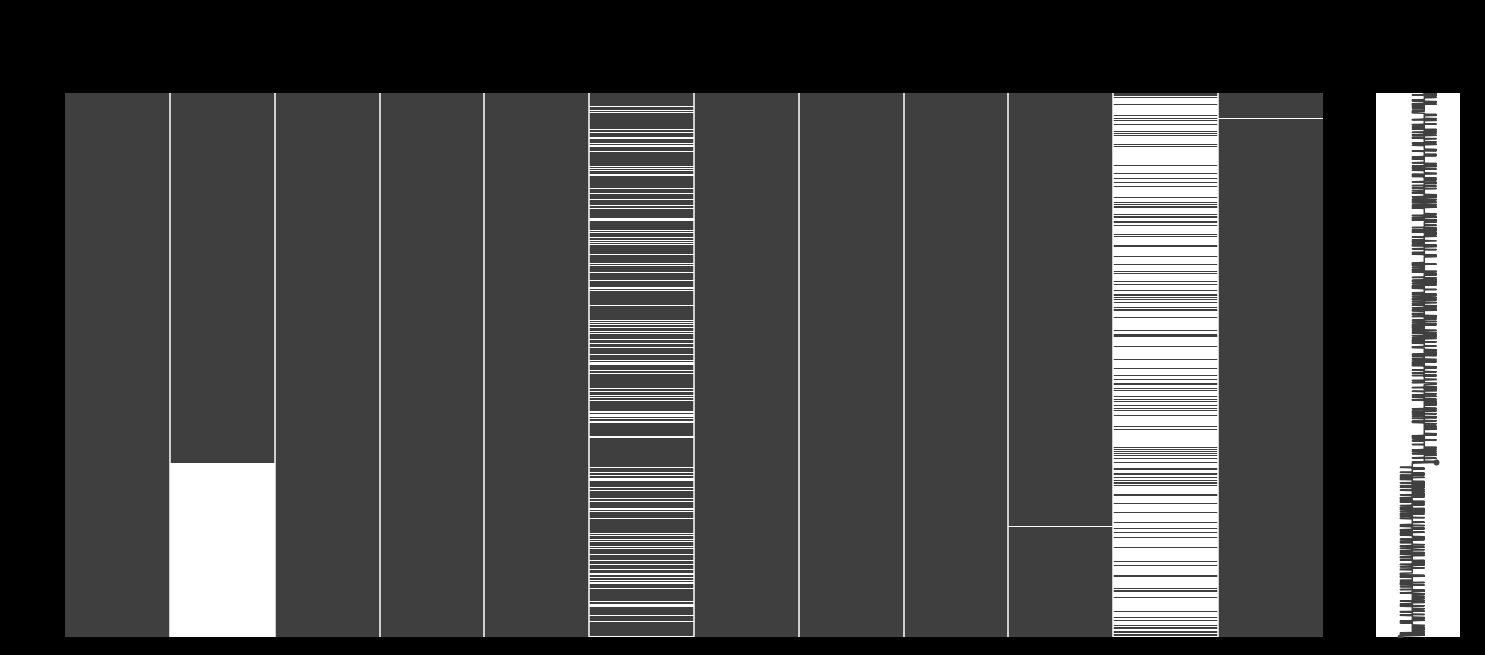





De même, utilisez la commande heatmap de ce module sur nos données.
Qu'est-ce que cela représente à votre avis ?

## Correction de la base de données

Il y a certains éléments de notre base que nous ne savons pas corriger
et qu'il est inutile de corriger (typiquement la colonne Survived) mais
nous pouvons par exemple modifier certains données pour avoir un
DataFrame plus « cohérent ».

-   Déjà nous allons commencer par enlever les colonnes qui nous gênent
    et n'apportent pas d'informations mais bien sûr, on peut se tromper.
    Avec la commande drop, enlevez les colonnes Ticket et Cabin
-   Je vous propose de remplacer les âges manquants par l'âge moyen ou
    médian de chaque classe